In [1]:
import os
import tweepy as tw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import itertools
import collections
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#Use your credentials to access the Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
 
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tw.API(auth, wait_on_rate_limit=True)


In [3]:
#Use Tweepy Cursor object to set when to start pulling related tweets and how many to pull
search_words = "#Covid19 OR #Coronavirus OR Covid19 OR Coronavirus OR covid19 OR coronavirus -filter:retweets"
date_until = '2020-06-23'

tweets = tw.Cursor(api.search, q=search_words, lang="en", until=date_until).items(99999)

In [4]:
#Create function that uses regex to search for URLs and replaces with ""
def url_remover(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [5]:
#Create list of lists containing username, location, and the message. Use the url_remover function to clean out all URLs
tweet_info = [[tweet.user.screen_name, tweet.user.location, url_remover(tweet.text)] for tweet in tweets]
len(tweet_info)


99999

In [6]:
#Put tweet data into pandas DataFrame
tweet_data = pd.DataFrame(data=tweet_info, 
                    columns=['user', "location", "message"])

In [14]:
#Split tweets into lists of words, flatten the lists into one list, and remove stopwords (e.g. 'and','it') 
stop_words = stopwords.words('english')
collection_words = ['Covid19','Coronavirus','covid19','coronavirus','amp']
stop_words = stop_words + collection_words
lists_wordlist = [i.lower().split() for i in tweet_data.message]
full_wordlist = list(itertools.chain(*lists_wordlist))
reduced_wordlist = [word for word in full_wordlist if word not in stop_words]

In [38]:
#Create dictionary of words and their frequency
word_counter = collections.Counter(reduced_wordlist)

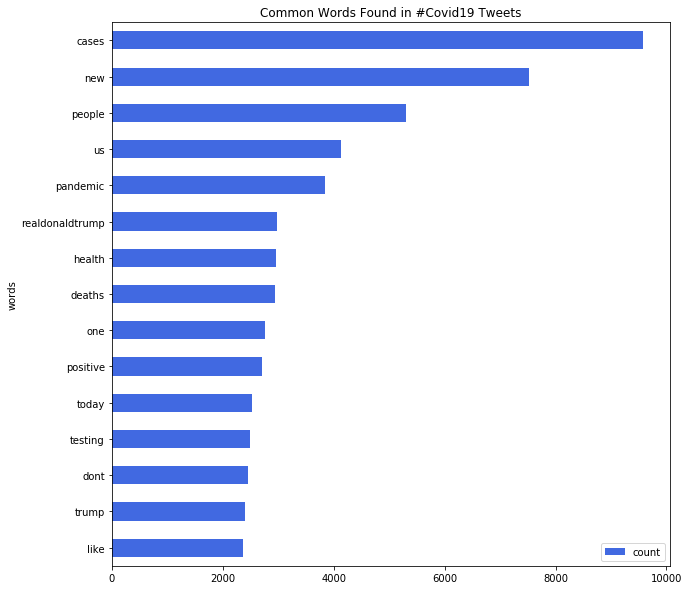

In [16]:
#Create barchart to display top 15 words most commonly found in Covid19 tweets
= pd.DataFrame(word_counter.most_common(15),
                          columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(10, 10))

covid19_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="royalblue")

ax.set_title("Common Words Found in #Covid19 Tweets")

plt.show()


# Bigrams

In [20]:
#Clean up the lists of the lists of words for each tweet
tweets_nsw = [[word for word in tweets if not word in stop_words]
              for tweets in lists_wordlist]

In [35]:
tweets_nsw[:5]

[['lying',
  'ppl',
  'hawaii',
  'masks',
  'protect',
  'according',
  'top',
  'doctors',
  'worldwide'],
 ['love',
  'opening',
  'segment',
  'us',
  'blacklivesmatter',
  'worlds',
  'current',
  'journey',
  'ar'],
 ['eclose89',
  'cnnbrk',
  'whats',
  'point',
  'pretty',
  'much',
  'everything',
  'society',
  'combat',
  'cancer',
  'well'],
 ['hyperprecarious',
  'lives',
  'bangladeshi',
  'migrants',
  'azad',
  'visas',
  'qatar',
  'pandemic',
  'via',
  'routedmag'],
 ['response',
  'telecontraception',
  'apps',
  'surged',
  'popularity',
  'reflecting',
  'shift',
  'reexamine',
  'cur']]

In [22]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [23]:
bigram_counts.most_common(100)

[(('new', 'cases'), 2172),
 (('tested', 'positive'), 830),
 (('confirmed', 'cases'), 654),
 (('positive', 'cases'), 536),
 (('social', 'distancing'), 511),
 (('second', 'wave'), 500),
 (('june', '22'), 415),
 (('wear', 'mask'), 409),
 (('total', 'cases'), 402),
 (('new', 'deaths'), 393),
 (('many', 'people'), 391),
 (('24', 'hours'), 387),
 (('last', '24'), 370),
 (('join', 'us'), 361),
 (('public', 'health'), 354),
 (('active', 'cases'), 351),
 (('cases', 'reported'), 347),
 (('test', 'positive'), 338),
 (('number', 'cases'), 337),
 (('june', '2020'), 269),
 (('death', 'toll'), 249),
 (('testing', 'scale'), 248),
 (('leovaradkar', 'xavierbettel'), 247),
 (('xavierbettel', 'markrutte'), 247),
 (('markrutte', 'sebastiankurz'), 247),
 (('sebastiankurz', 'regsprecher'), 247),
 (('regsprecher', 'testing'), 247),
 (('scale', 'essential'), 247),
 (('hi', 'leovaradkar'), 246),
 (('last', 'week'), 246),
 (('total', 'number'), 245),
 (('haider', 'ali'), 241),
 (('wearing', 'mask'), 239),
 (('to

In [30]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(new, cases)",2172
1,"(tested, positive)",830
2,"(confirmed, cases)",654
3,"(positive, cases)",536
4,"(social, distancing)",511
5,"(second, wave)",500
6,"(june, 22)",415
7,"(wear, mask)",409
8,"(total, cases)",402
9,"(new, deaths)",393


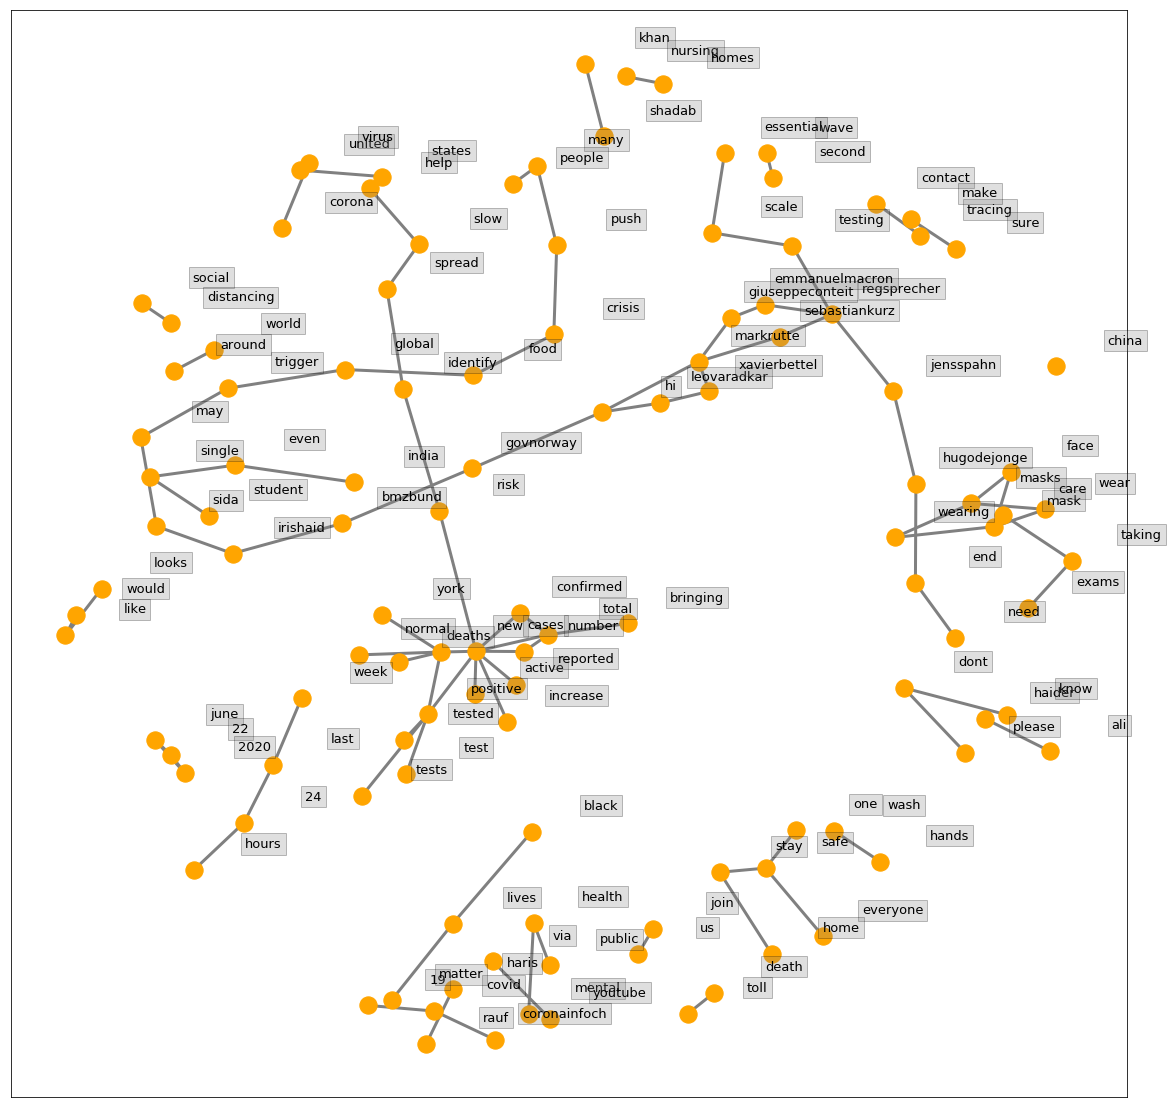

In [34]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 4))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='orange',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()